In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/heart2_full_data.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [102]:
df.isnull().sum()
df= df.drop_duplicates()
df.shape

(918, 12)

In [103]:
df.columns
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


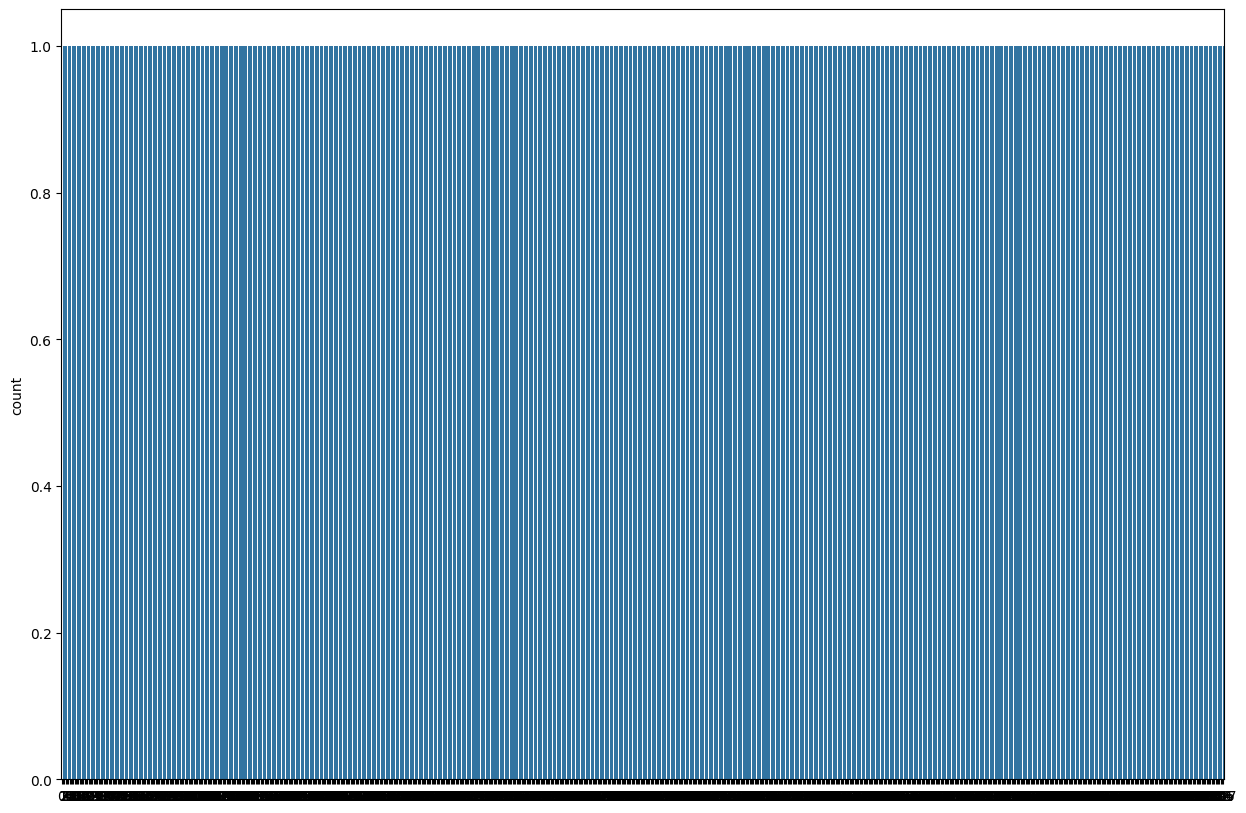

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(df['HeartDisease'])
plt.show()

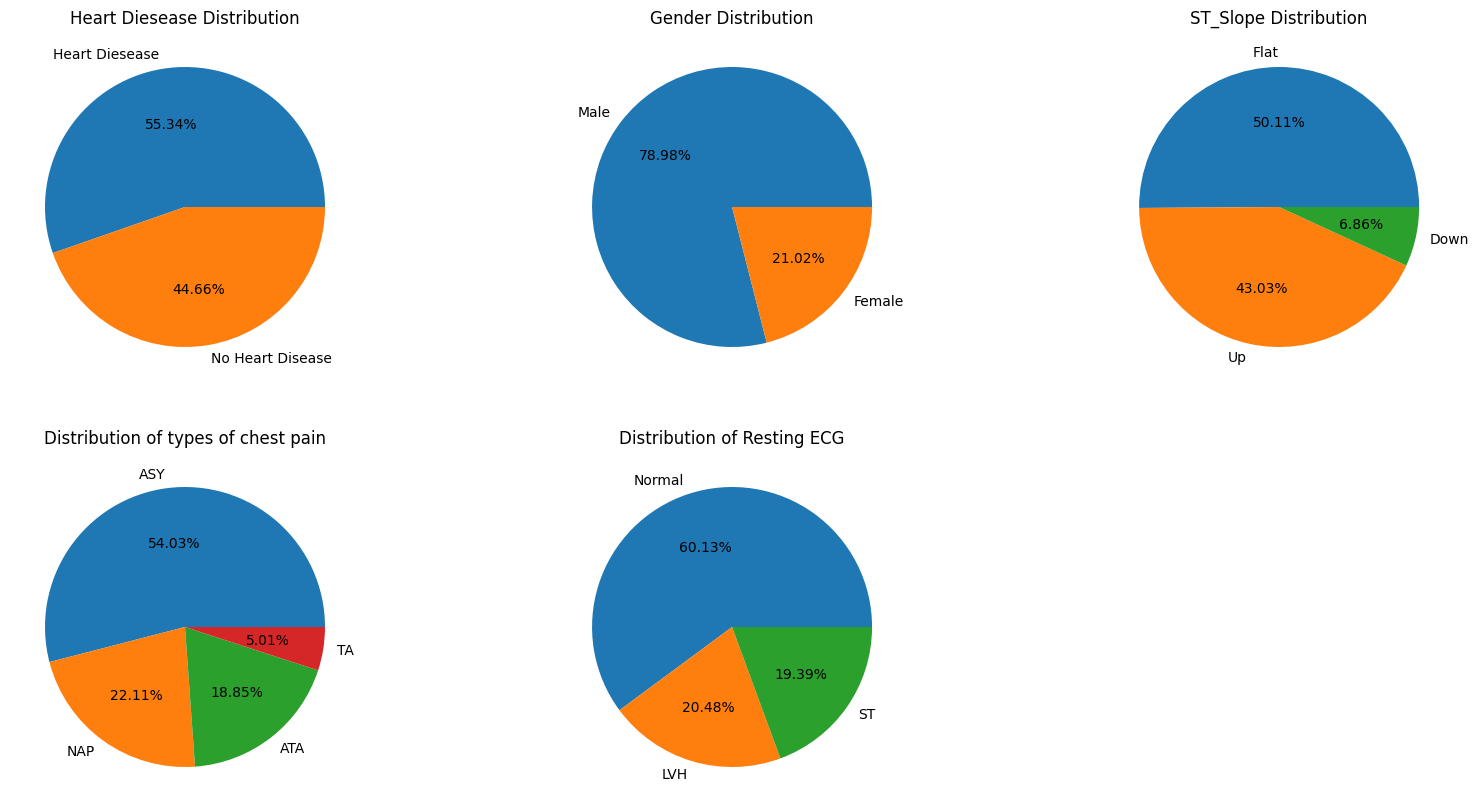

In [105]:
tdf=df['HeartDisease'].value_counts().reset_index()
tdf1=df['Sex'].value_counts().reset_index()
tdf2=df['ChestPainType'].value_counts().reset_index()
tdf3=df['RestingECG'].value_counts().reset_index()
tdf4=df['ST_Slope'].value_counts().reset_index()
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].pie(x=tdf['count'],labels=['Heart Diesease','No Heart Disease'],autopct='%.2f%%')
axes[0][0].set_title("Heart Diesease Distribution")
axes[0][1].pie(x=tdf1['count'],labels=['Male','Female'],autopct='%.2f%%')
axes[0][1].set_title("Gender Distribution")
axes[0][2].pie(x=tdf4['count'],labels=tdf4['ST_Slope'],autopct='%.2f%%')
axes[0][2].set_title("ST_Slope Distribution")
axes[1][0].pie(x=tdf2['count'],labels=tdf2['ChestPainType'],autopct='%.2f%%')
axes[1][0].set_title("Distribution of types of chest pain")
axes[1][1].pie(x=tdf3['count'],labels=tdf3['RestingECG'],autopct='%.2f%%')
axes[1][1].set_title("Distribution of Resting ECG")
axes[1][2].set_visible(False)
plt.show()

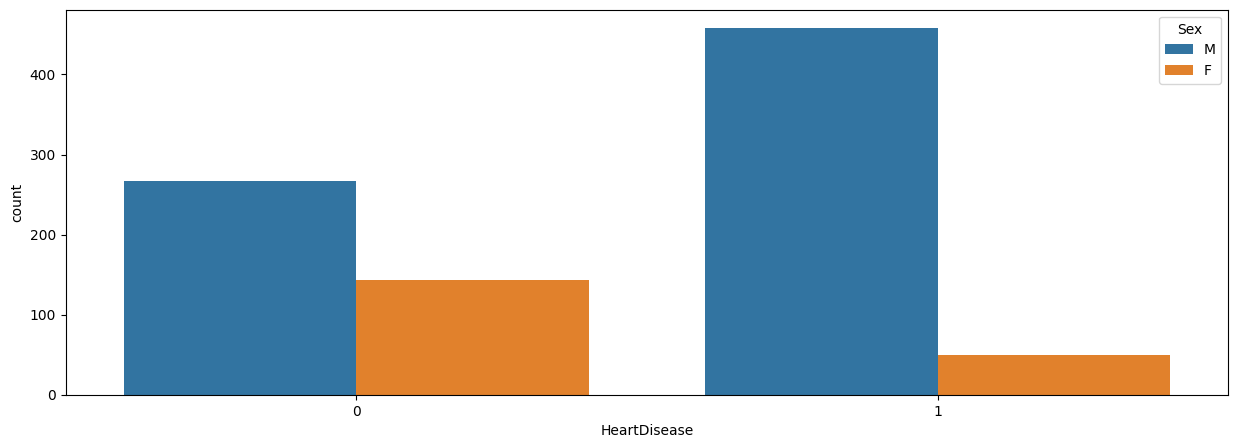

In [106]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='HeartDisease',hue='Sex')
plt.show()

<ipython-input-107-b1d503171f5a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=proportions, palette='magma')


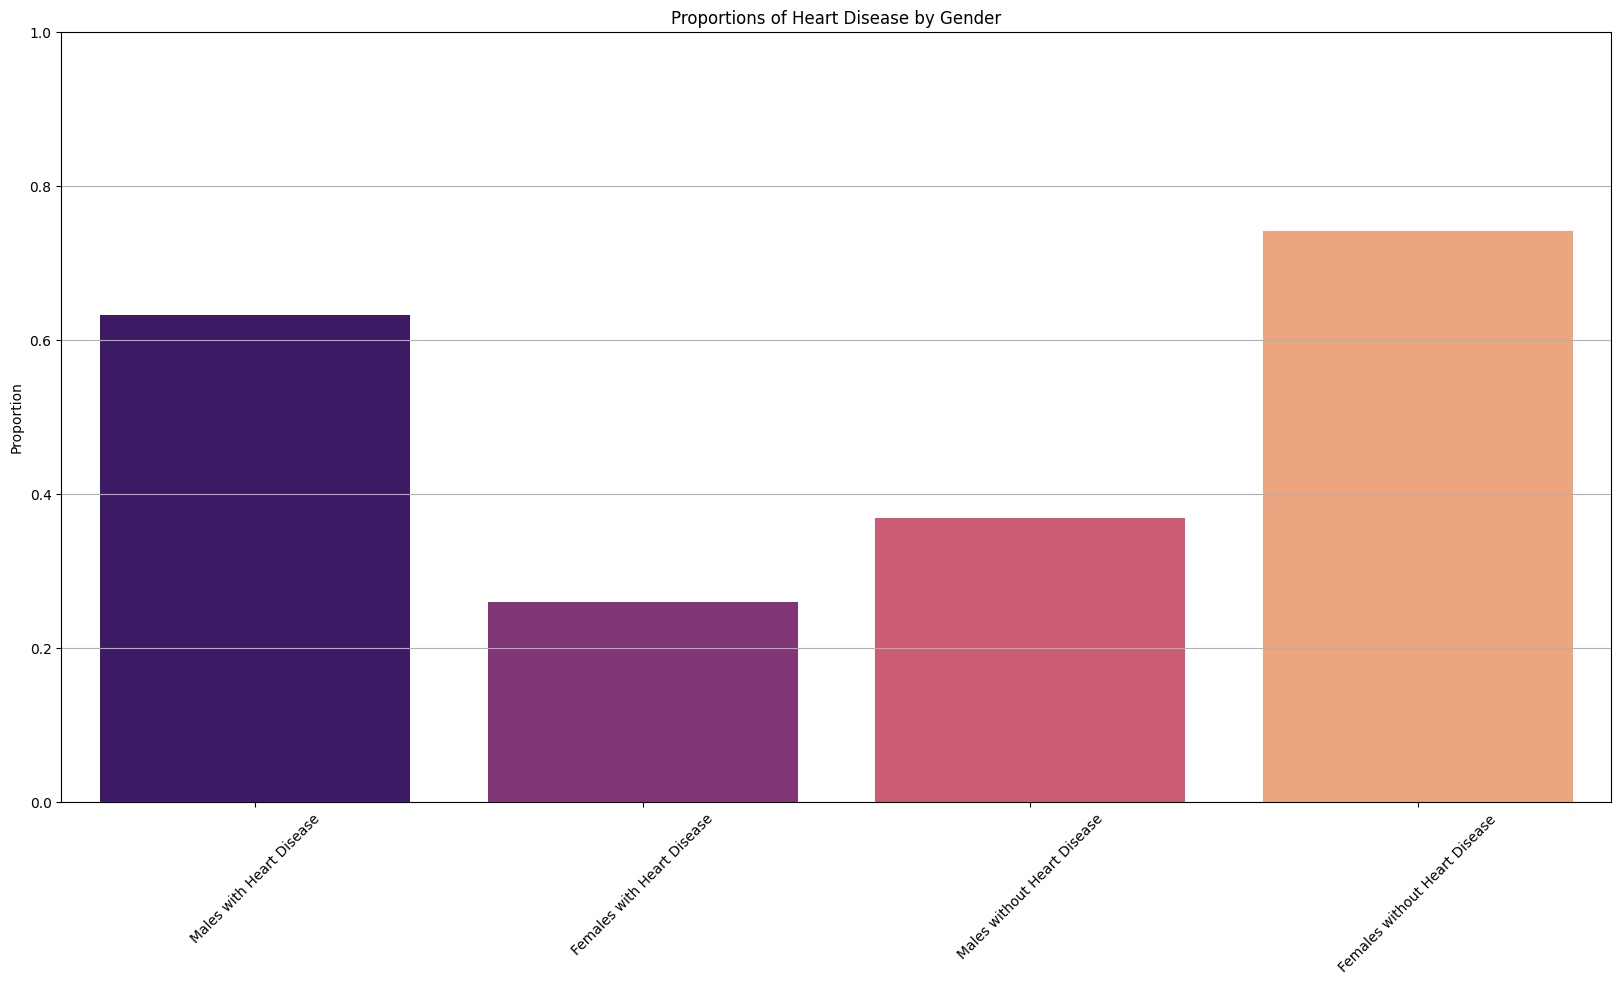

In [107]:
c=df.loc[(df['HeartDisease']==1)&(df['Sex']=='M')].shape[0]
c1=df.loc[(df['HeartDisease']==1)&(df['Sex']=='F')].shape[0]
c2=df.loc[(df['HeartDisease']==0)&(df['Sex']=='M')].shape[0]
c3=df.loc[(df['HeartDisease']==0)&(df['Sex']=='F')].shape[0]
total_counts = df['Sex'].value_counts()
proportions = [
    c/total_counts['M'],
    c1/total_counts['F'],
    c2/total_counts['M'],
    c3/total_counts['F']
]
categories = [
    'Males with Heart Disease',
    'Females with Heart Disease',
    'Males without Heart Disease',
    'Females without Heart Disease'
]
plt.figure(figsize=(20,10))
sns.barplot(x=categories, y=proportions, palette='magma')
plt.title('Proportions of Heart Disease by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

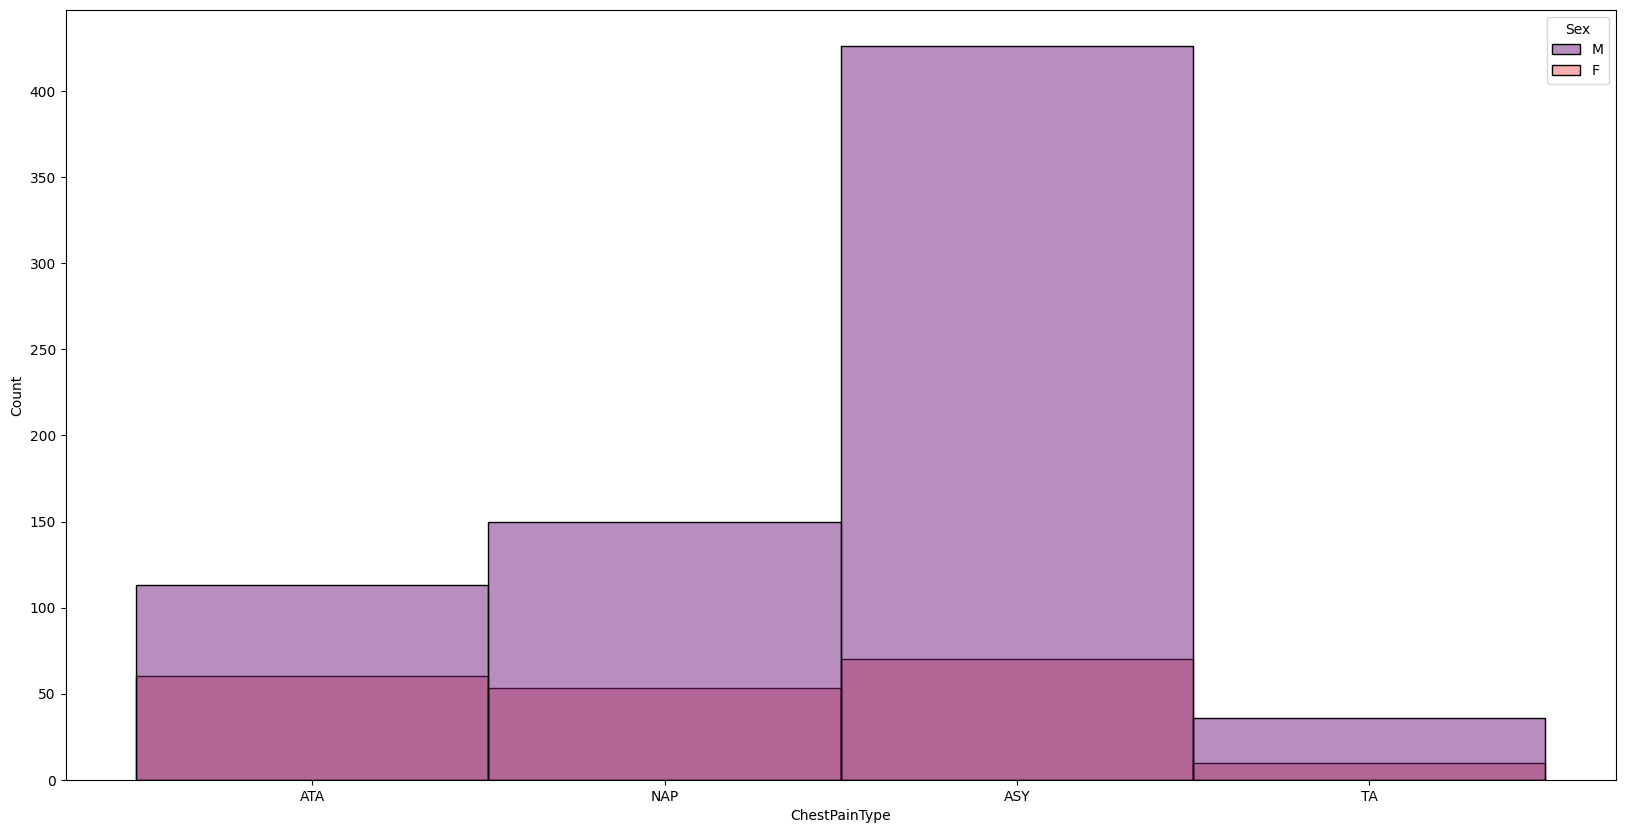

In [108]:
plt.figure(figsize=(20,10))
sns.histplot(data=df,x='ChestPainType',hue='Sex',palette='magma')
plt.show()

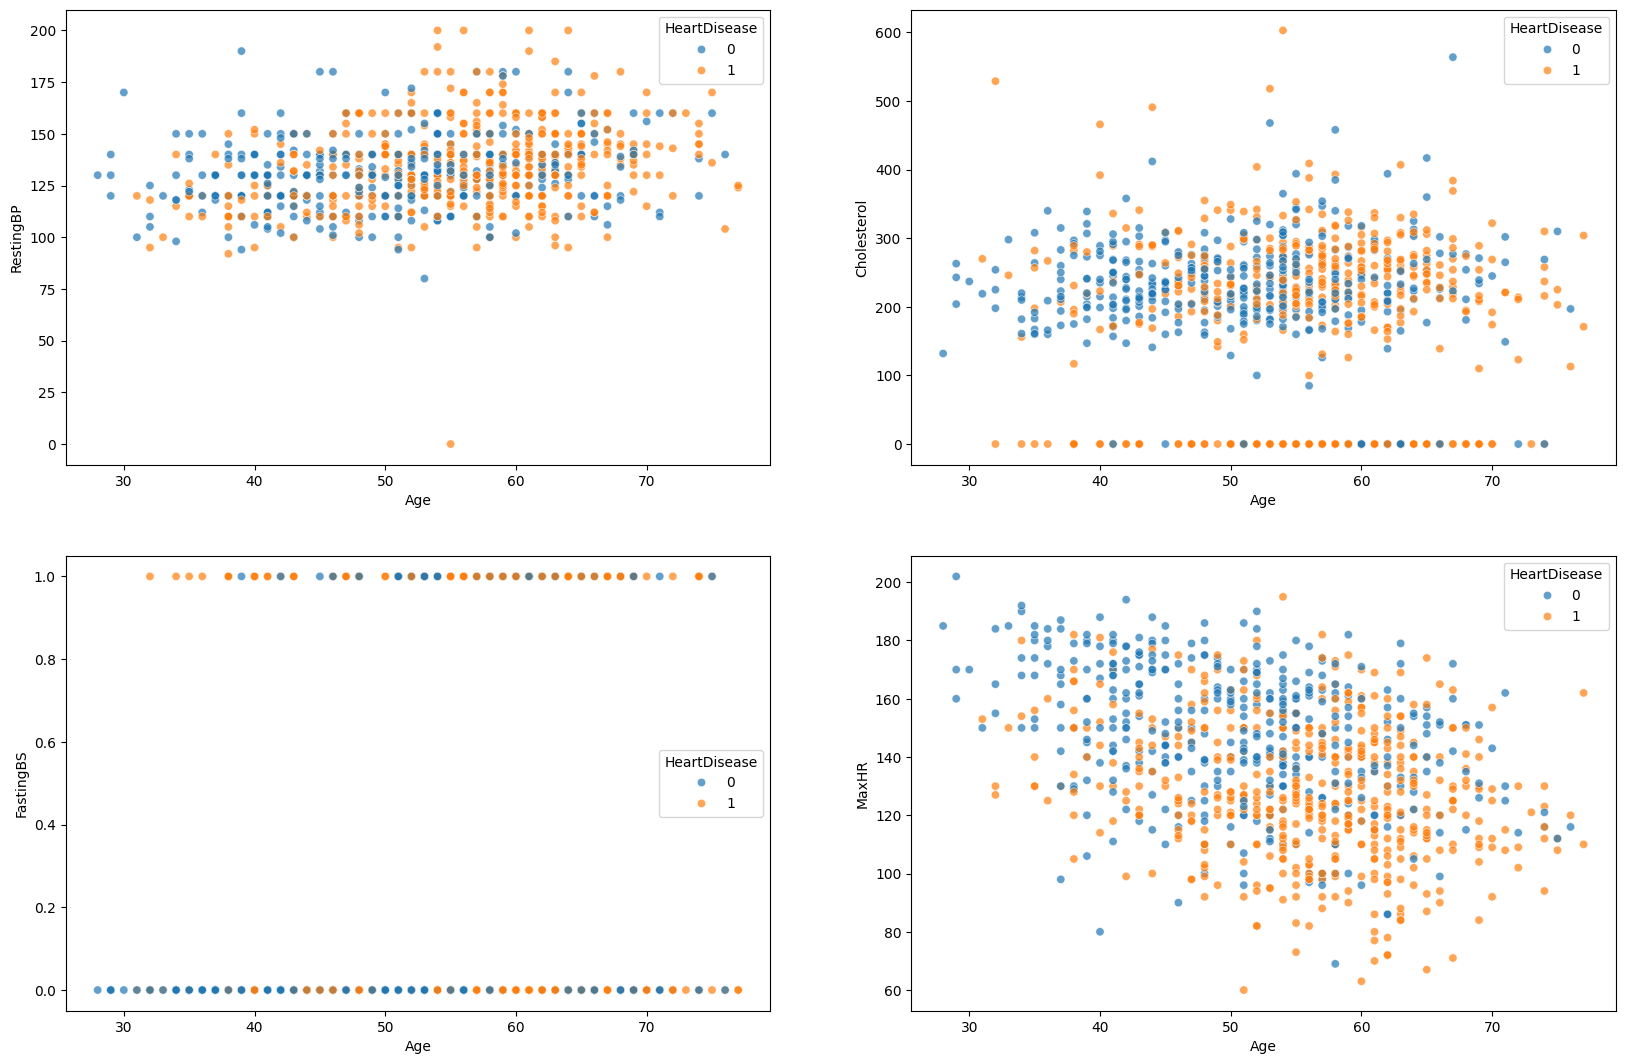

In [109]:
fig,axes=plt.subplots(2,2,figsize=(20,13))
sns.scatterplot(data=df,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=df,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()

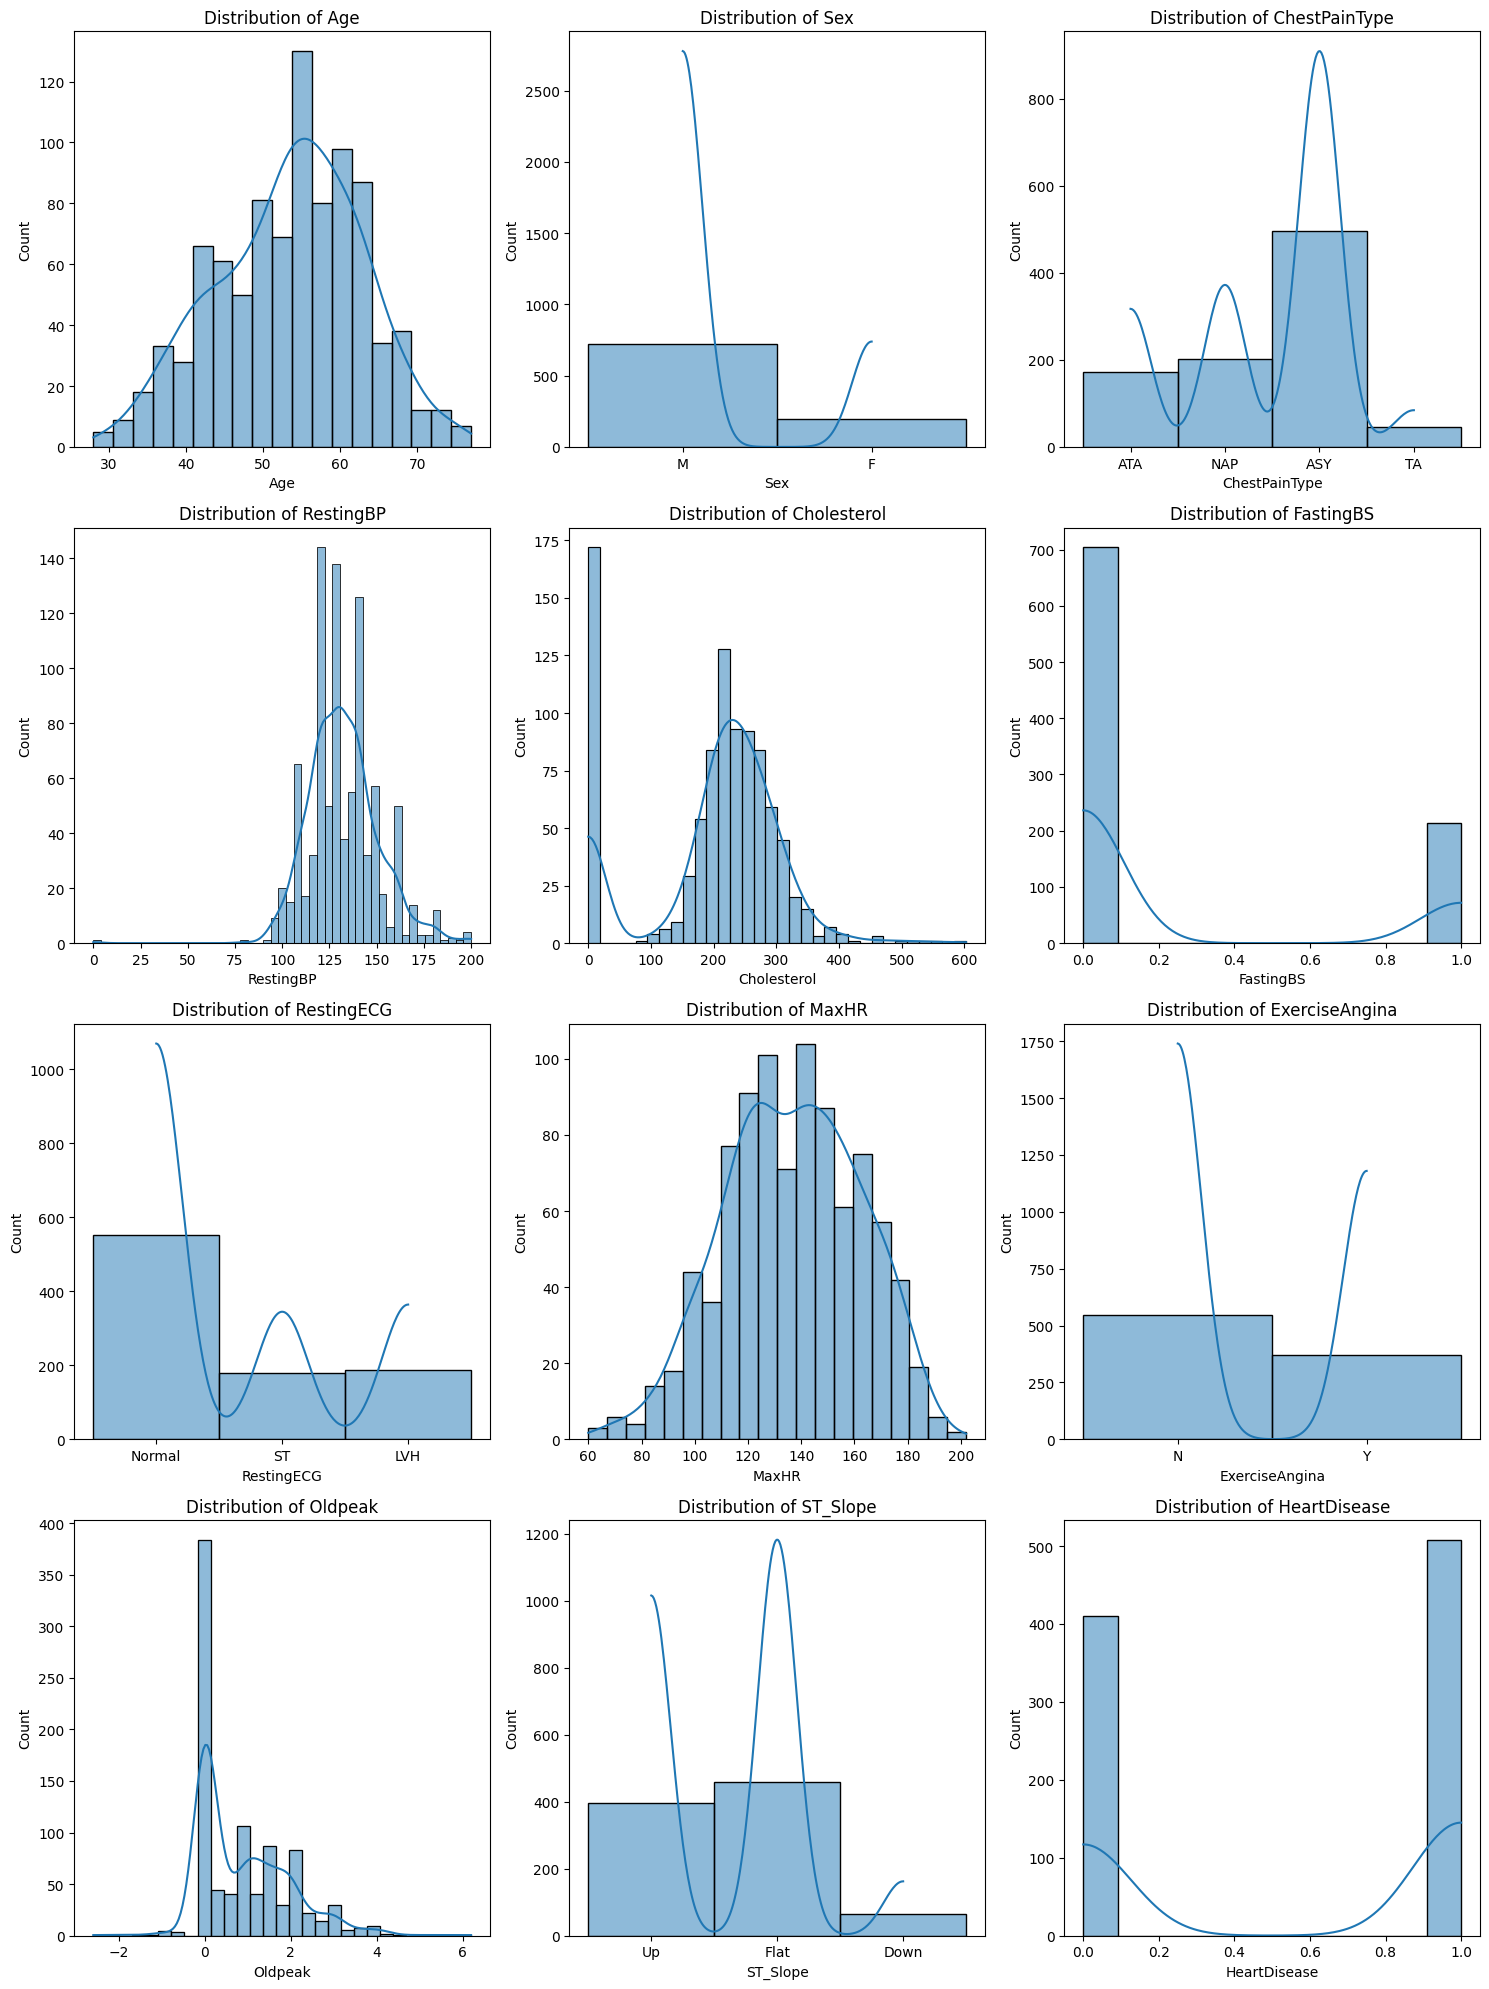

In [110]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns[:12],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

<ipython-input-111-2f1bd7f0a76b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-111-2f1bd7f0a76b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-111-2f1bd7f0a76b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
<ipython-input-111-2f1bd7f0a76b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

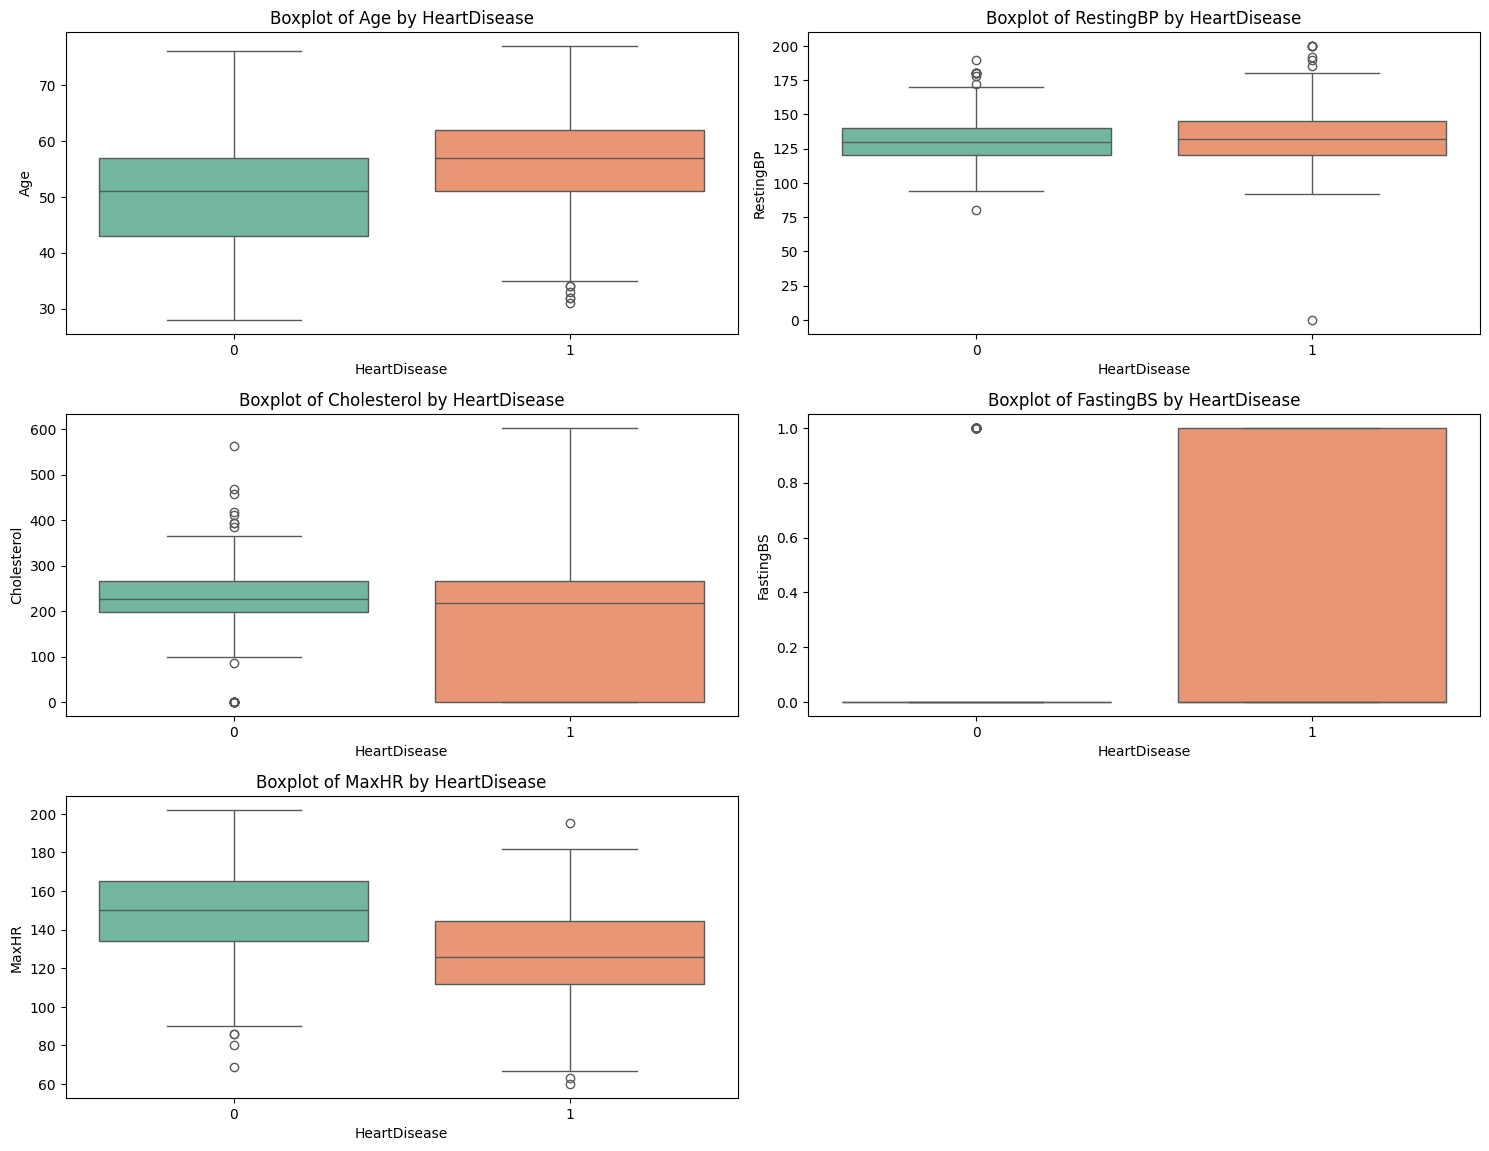

In [111]:
plt.figure(figsize=(15,15))
for i, col in enumerate(df.columns[df.dtypes=='int64'].drop('HeartDisease')[:5], 1):
    plt.subplot(4, 2, i)
    plt.title(f"Boxplot of {col} by HeartDisease")
    sns.boxplot(x=df['HeartDisease'], y=col, data=df, palette="Set2")
    plt.tight_layout()
plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [113]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


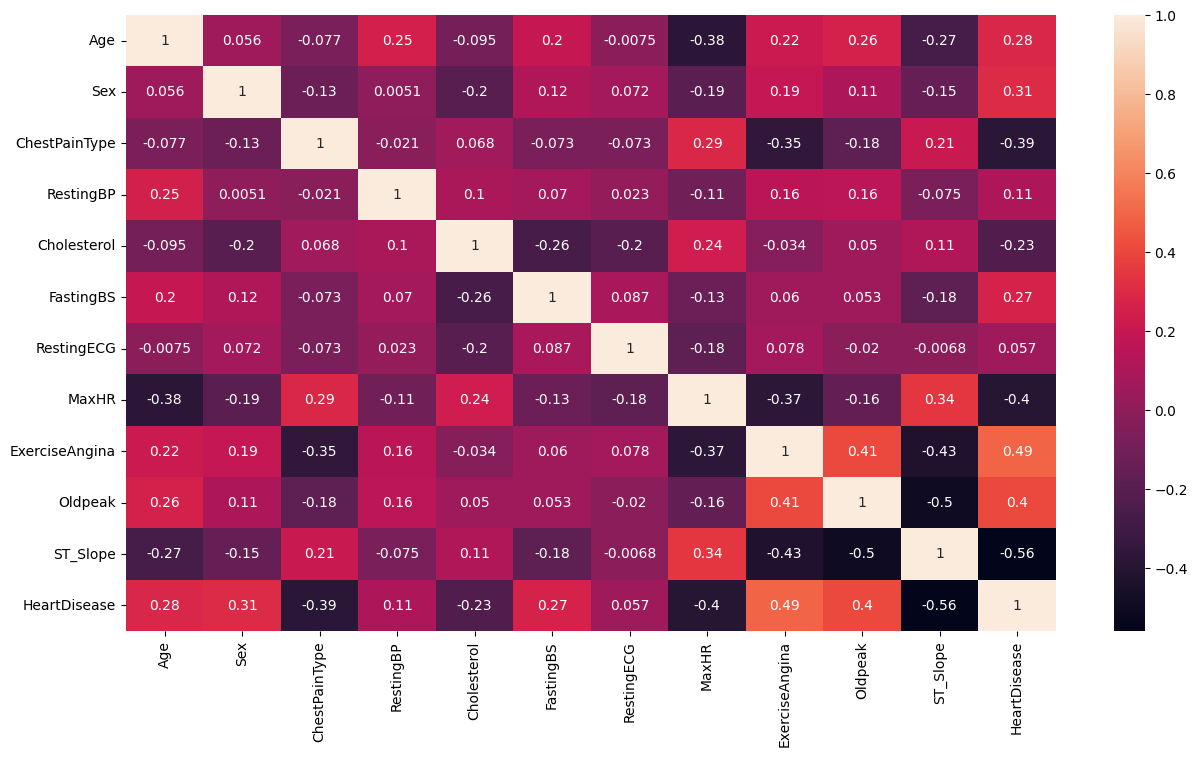

In [114]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [115]:
x=df.drop(columns='HeartDisease')
y=df['HeartDisease']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'MI Score': mi})
mi_df=mi_df.sort_values(by='MI Score', ascending=False)
mi_df

,Feature,MI Score
10,ST_Slope,0.226884
2,ChestPainType,0.156370
9,Oldpeak,0.116436
8,ExerciseAngina,0.113322
7,MaxHR,0.098639
4,Cholesterol,0.066571
1,Sex,0.058172
0,Age,0.035214
5,FastingBS,0.032386
3,RestingBP,0.017645


In [116]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.20,random_state=20)

In [117]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [118]:
xgb = XGBClassifier(eval_metric='logloss')

# Define the hyperparameter grid
params = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
}

# RandomizedSearchCV for hyperparameter tuning
n_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=params,
    cv=10,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,   # Use all available cores

)

# Fit the model
n_xgb.fit(x_t, y_t)

# Print the best parameters and best score
print("Best Parameters:", n_xgb.best_params_)
print("Best Score:", n_xgb.best_score_)

# Extract the best estimator
n_xgb = n_xgb.best_estimator_

Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.19, 'colsample_bytree': 1.0}
Best Score: 0.8541836356904848


In [119]:
pred_t=n_xgb.predict(x_t)
pred=n_xgb.predict(x_te)

In [120]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.004203970416504483}
0.8486301369863014


In [121]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),'min_samples_leaf':list(np.arange(2,41)),
       'max_features':['sqrt','log2',None],'max_depth':list(np.arange(1,31))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 26, 'criterion': 'gini'}
0.8445390596075528


In [122]:
pred1_t=ndt.predict(x_t)
pred1=ndt.predict(x_te)

In [123]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_depth':list(np.arange(1,51)),'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_depth': 37, 'criterion': 'gini'}
0.8595890410958903


In [124]:
pred2_t=nrf.predict(x_t)
pred2=nrf.predict(x_te)

In [125]:
tdf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','XGBoostClassifier'],
                  'Training Accuracy':[accuracy_score(y_t,pred1_t),accuracy_score(y_t,pred2_t),accuracy_score(y_t,pred_t)],
                  'Training Precision':[precision_score(y_t,pred1_t),precision_score(y_t,pred2_t),precision_score(y_t,pred_t)],
                  'Training Recall':[recall_score(y_t,pred1_t),recall_score(y_t,pred2_t),recall_score(y_t,pred_t)],
                  'Training F1 Score':[f1_score(y_t,pred1_t),f1_score(y_t,pred2_t),f1_score(y_t,pred_t)]})
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Decsion Tree Classifier,0.863760,0.841060,0.93154,0.883991
1,Random Forest Classifier,0.881471,0.872685,0.92176,0.896552
2,XGBoostClassifier,0.994550,0.990315,1.00000,0.995134


In [126]:
tedf=pd.DataFrame({'Classification Algorithms':['Decsion Tree Classifier','Random Forest Classifier','XGBoostClassifier'],
                  'Testing Accuracy':[accuracy_score(y_te,pred1),accuracy_score(y_te,pred2),accuracy_score(y_te,pred)],
                  'Testing Precision':[precision_score(y_te,pred1),precision_score(y_te,pred2),precision_score(y_te,pred)],
                  'Testing Recall':[recall_score(y_te,pred1),recall_score(y_te,pred2),recall_score(y_te,pred)],
                  'Testing F1 Score':[f1_score(y_te,pred1),f1_score(y_te,pred2),f1_score(y_te,pred)]})
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Decsion Tree Classifier,0.820652,0.775000,0.939394,0.849315
1,Random Forest Classifier,0.891304,0.869159,0.939394,0.902913
2,XGBoostClassifier,0.875000,0.858491,0.919192,0.887805


In [127]:
print('Decison Tree Classifier\n\n')
print(classification_report(y_te,pred1))
print('\n\n\nRandom Forest Classifier\n\n')
print(classification_report(y_te,pred2))
print('\n\n\nXGBoost Classifier\n\n')
print(classification_report(y_te,pred))

Decison Tree Classifier


              precision    recall  f1-score   support

           0       0.91      0.68      0.78        85
           1       0.78      0.94      0.85        99

    accuracy                           0.82       184
   macro avg       0.84      0.81      0.81       184
weighted avg       0.84      0.82      0.82       184




Random Forest Classifier


              precision    recall  f1-score   support

           0       0.92      0.84      0.88        85
           1       0.87      0.94      0.90        99

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184




XGBoost Classifier


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        85
           1       0.86      0.92      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87     

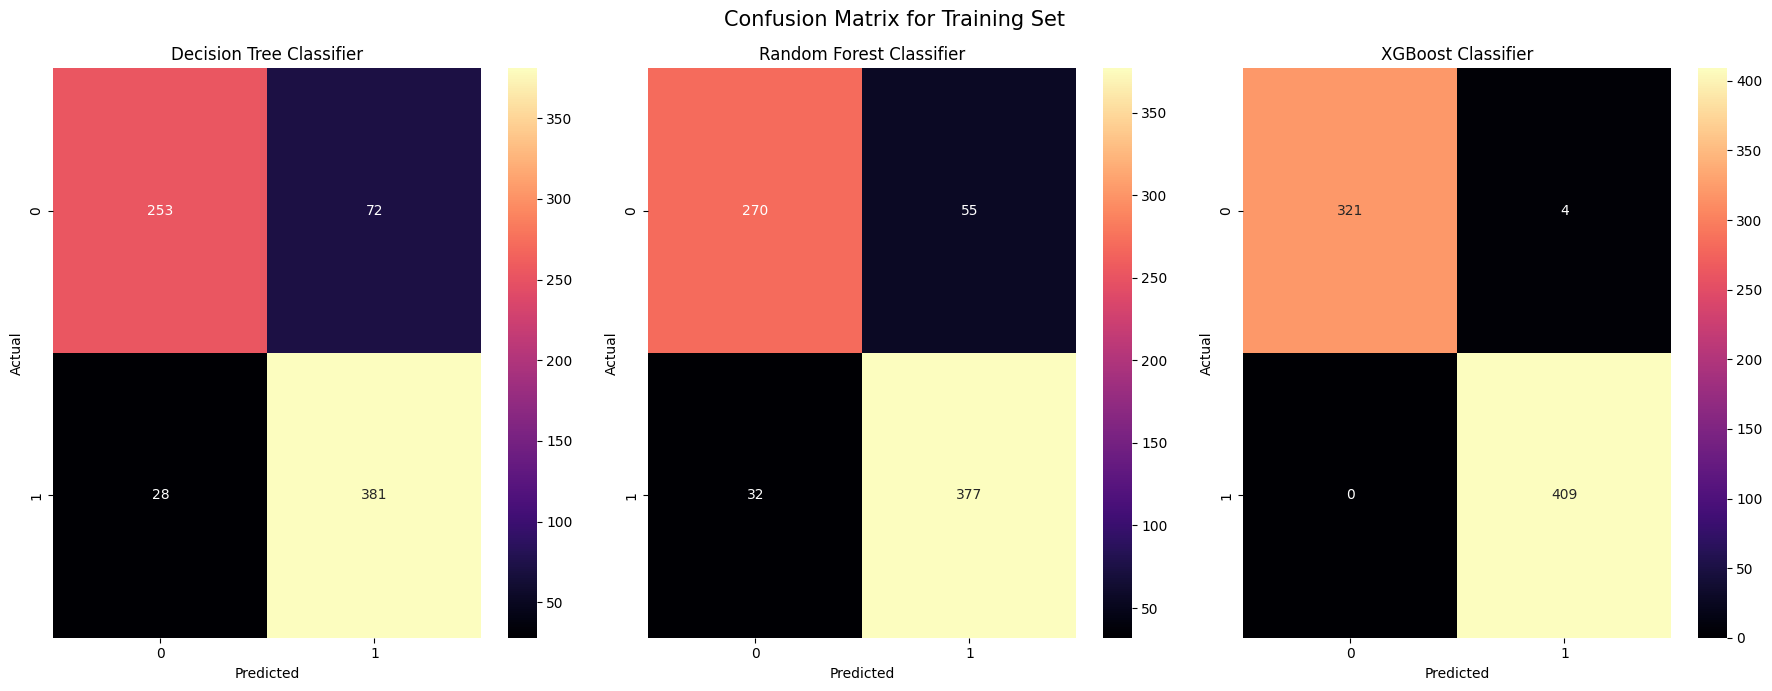

In [128]:
cm_tree=confusion_matrix(y_t,pred1_t)
cm_rf=confusion_matrix(y_t,pred2_t)
cm_XGBoost=confusion_matrix(y_t,pred_t)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_XGBoost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('XGBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Training Set',fontsize=15)
plt.tight_layout()
plt.show()

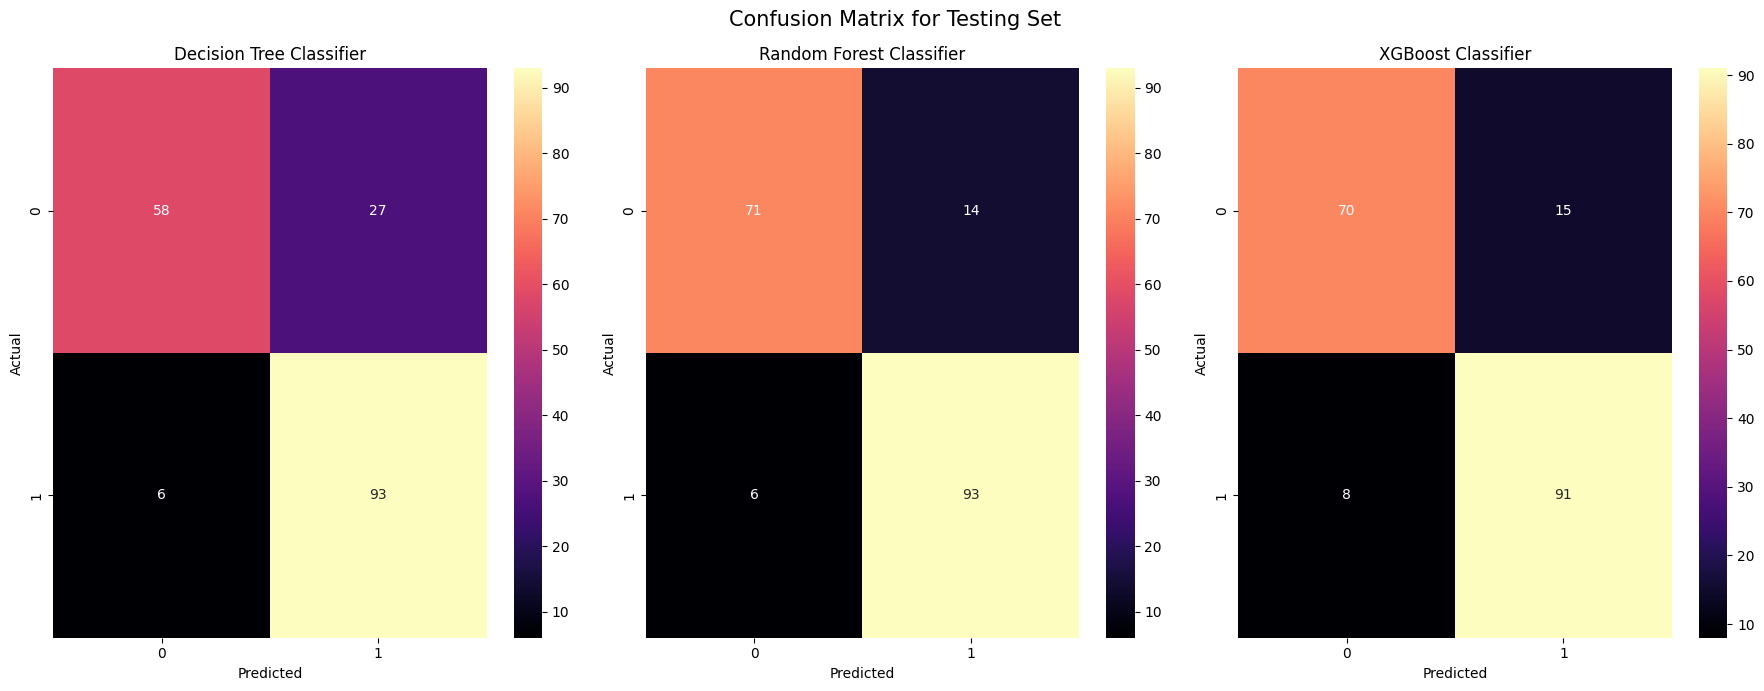

In [129]:
cm_tree=confusion_matrix(y_te,pred1)
cm_rf=confusion_matrix(y_te,pred2)
cm_XGBoost=confusion_matrix(y_te,pred)
fig, axes=plt.subplots(1, 3, figsize=(18, 7))

sns.heatmap(cm_tree,annot=True,fmt='d',cmap='magma',ax=axes[0])
axes[0].set_title('Decision Tree Classifier')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(cm_rf, annot=True,fmt='d',cmap='magma',ax=axes[1])
axes[1].set_title('Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
sns.heatmap(cm_XGBoost,annot=True,fmt='d',cmap='magma',ax=axes[2])
axes[2].set_title('XGBoost Classifier')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.suptitle('Confusion Matrix for Testing Set',fontsize=15)
plt.tight_layout()
plt.show()

In [130]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport
Report = ProfileReport(df,title ="Heart Disease Prediction")
Report.to_file(output_file='Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]